<a href="https://colab.research.google.com/github/abhi-11nav/Diabetes-Prediction_/blob/main/Indian_diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np 

## Dataset link 

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [4]:
dataset_link = "/content/drive/MyDrive/Diabetes Prediction/diabetes.csv"

In [5]:
dataset = pd.read_csv(dataset_link)

In [6]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
dataset.shape

(768, 9)

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Splitting the data into train and test and preprocessing them differently to avoid data lekage

from sklearn.model_selection import train_test_split

X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]


train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=101)

# Combining the features and labels
X = pd.concat([train_X, train_y], axis=1)
y = pd.concat([test_X, test_y], axis=1)

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
709,2,93,64,32,160,38.0,0.674,23,1
425,4,184,78,39,277,37.0,0.264,31,1
135,2,125,60,20,140,33.8,0.088,31,0
630,7,114,64,0,0,27.4,0.732,34,1
500,2,117,90,19,71,25.2,0.313,21,0


In [17]:
# Checking for any missing values

X.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

 There are no missing values

In [26]:
# Percentage of outputs 

print("0 count: ",np.round(X["Outcome"].value_counts()[0] / len(X["Outcome"]) * 100,2),"\n","1 count:",np.round(X["Outcome"].value_counts()[1] / len(X["Outcome"]) * 100,2))

0 count:  64.66 
 1 count: 35.34


In [27]:
# Importing visualization libraries

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

Text(0, 0.5, 'COUNT')

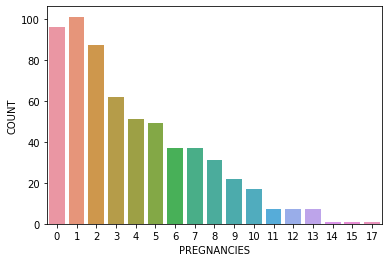

In [59]:
plot = sns.barplot(x=X["Pregnancies"].value_counts().index,  y = X["Pregnancies"].value_counts())
plot.set_xlabel("PREGNANCIES")
plot.set_ylabel("COUNT")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


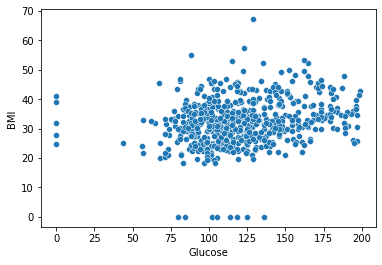

In [60]:
sns.scatterplot(X['Glucose'], X["BMI"])

In [61]:
# Peforming scaling on train and test data seperately

from sklearn.preprocessing import MinMaxScaler

train_scaler = MinMaxScaler()

test_scaler = MinMaxScaler()

X = pd.DataFrame(train_scaler.fit_transform(X), columns = X.columns)

y = pd.DataFrame(test_scaler.fit_transform(y), columns = y.columns)

In [63]:
# Spllitting into train and validaton test with respect to features and labels 

train_X = X.drop("Outcome", axis=1)
train_y = X["Outcome"]

test_X = y.drop("Outcome", axis=1)
test_y = y["Outcome"]

# MODEL 

In [68]:
import tensorflow as tf
from tensorflow import keras

from keras.layers import Dense, Dropout, InputLayer
from keras.models import Model, Sequential 

In [134]:
def build_model(layers = 1, input_shape = [8,], units = 100):
  model = keras.models.Sequential()
  model.add(InputLayer(input_shape = input_shape))

  for layers in range(layers):
    model.add(Dense(units, activation="relu"))

  model.add(Dense(1, activation="sigmoid"))

  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['Precision'])

  return model

In [135]:
wrapper = keras.wrappers.scikit_learn.KerasClassifier(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
params = {
    "layers":[x for x in range(1,5,1)],
    "units" : [x for x in range(100, 300, 50)]
}

In [138]:
ann_model = RandomizedSearchCV(wrapper, params, n_iter=10, cv=3)

In [ ]:
ann_model.fit(train_X, train_y, epochs = 20, validation_data=(test_X, test_y), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/20
13/13 [==============================] - 1s 27ms/step - loss: 0.6743 - precision: 0.0000e+00 - val_loss: 0.6379 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6414 - precision: 1.0000 - val_loss: 0.6024 - val_precision: 0.5714
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6125 - precision: 0.5634 - val_loss: 0.5634 - val_precision: 0.5714
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5791 - precision: 0.5932 - val_loss: 0.5303 - val_precision: 0.6000
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5502 - precision: 0.6127 - val_loss: 0.4937 - val_precision: 0.5893
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5371 - precision: 0.6417 - val_loss: 0.4806 - val_precision: 0.7143
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5159 - precision: 0.6163 - val_loss: 0.5218 - val_precision: 0.81

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 27ms/step - loss: 0.6602 - precision: 0.0000e+00 - val_loss: 0.6400 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6404 - precision: 0.0000e+00 - val_loss: 0.5970 - val_precision: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6093 - precision: 0.6667 - val_loss: 0.5570 - val_precision: 0.7500
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5850 - precision: 0.5806 - val_loss: 0.5599 - val_precision: 0.8333
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5593 - precision: 0.6484 - val_loss: 0.4901 - val_precision: 0.6596
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5229 - precision: 0.6694 - val_loss: 0.6143 - val_precision: 0.7500
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5482 - precision: 0.6167 - val_loss: 0.5678 - val_precision: 0.8000
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 2s 28ms/step - loss: 0.6638 - precision: 0.0000e+00 - val_loss: 0.6386 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6303 - precision: 0.7500 - val_loss: 0.6061 - val_precision: 0.5294
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6010 - precision: 0.5775 - val_loss: 0.5766 - val_precision: 0.5806
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5714 - precision: 0.5963 - val_loss: 0.5591 - val_precision: 0.5312
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5559 - precision: 0.6330 - val_loss: 0.5508 - val_precision: 0.6296
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5418 - precision: 0.7033 - val_loss: 0.5472 - val_precision: 0.6066
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5628 - precision: 0.6190 - val_loss: 0.5187 - val_precision: 0.6250
Epoch 8/

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 26ms/step - loss: 0.6641 - precision: 0.4286 - val_loss: 0.6277 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6286 - precision: 0.6250 - val_loss: 0.5769 - val_precision: 0.6154
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5870 - precision: 0.5896 - val_loss: 0.5389 - val_precision: 0.6562
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5571 - precision: 0.6667 - val_loss: 0.4986 - val_precision: 0.7000
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5196 - precision: 0.6493 - val_loss: 0.4768 - val_precision: 0.7222
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.4966 - precision: 0.6759 - val_loss: 0.5207 - val_precision: 0.8696
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.4840 - precision: 0.6800 - val_loss: 0.4746 - val_precision: 0.8400
Epoch 8/20
1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 28ms/step - loss: 0.6635 - precision: 0.0000e+00 - val_loss: 0.6299 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6336 - precision: 0.6000 - val_loss: 0.5830 - val_precision: 0.6190
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6103 - precision: 0.6667 - val_loss: 0.5393 - val_precision: 0.5909
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5779 - precision: 0.6000 - val_loss: 0.5490 - val_precision: 0.7692
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5538 - precision: 0.6389 - val_loss: 0.5827 - val_precision: 0.8000
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5471 - precision: 0.6466 - val_loss: 0.5794 - val_precision: 0.7857
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5492 - precision: 0.6216 - val_loss: 0.5027 - val_precision: 0.7857
Epoch 8/

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 27ms/step - loss: 0.6627 - precision: 0.0000e+00 - val_loss: 0.6376 - val_precision: 0.2500
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6337 - precision: 0.6400 - val_loss: 0.5990 - val_precision: 0.5294
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5985 - precision: 0.5596 - val_loss: 0.5862 - val_precision: 0.6087
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5805 - precision: 0.5797 - val_loss: 0.5765 - val_precision: 0.6154
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5546 - precision: 0.6132 - val_loss: 0.5325 - val_precision: 0.5750
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5469 - precision: 0.6161 - val_loss: 0.5189 - val_precision: 0.6304
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5158 - precision: 0.6549 - val_loss: 0.5189 - val_precision: 0.6562
Epoch 8/20
1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 26ms/step - loss: 0.6788 - precision: 0.3766 - val_loss: 0.6537 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6575 - precision: 0.0000e+00 - val_loss: 0.6270 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6346 - precision: 0.5116 - val_loss: 0.5969 - val_precision: 0.6000
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6235 - precision: 0.5645 - val_loss: 0.5593 - val_precision: 0.5714
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5761 - precision: 0.6203 - val_loss: 0.5256 - val_precision: 0.5882
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5493 - precision: 0.6127 - val_loss: 0.5027 - val_precision: 0.6279
Epoch 7/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5326 - precision: 0.6406 - val_loss: 0.4756 - val_precision: 0.6383
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 28ms/step - loss: 0.6687 - precision: 0.5000 - val_loss: 0.6475 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6468 - precision: 0.0000e+00 - val_loss: 0.6232 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6300 - precision: 0.5185 - val_loss: 0.5962 - val_precision: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6238 - precision: 0.6190 - val_loss: 0.5735 - val_precision: 0.5870
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6046 - precision: 0.5810 - val_loss: 0.5584 - val_precision: 0.6667
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5725 - precision: 0.6707 - val_loss: 0.5214 - val_precision: 0.7308
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5425 - precision: 0.6818 - val_loss: 0.4843 - val_precision: 0.7273
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 27ms/step - loss: 0.6770 - precision: 0.3448 - val_loss: 0.6539 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6490 - precision: 0.0000e+00 - val_loss: 0.6305 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6219 - precision: 1.0000 - val_loss: 0.5945 - val_precision: 0.5833
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5961 - precision: 0.6494 - val_loss: 0.5707 - val_precision: 0.6667
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5609 - precision: 0.6330 - val_loss: 0.5485 - val_precision: 0.5926
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5445 - precision: 0.6915 - val_loss: 0.5225 - val_precision: 0.6111
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5231 - precision: 0.6429 - val_loss: 0.5382 - val_precision: 0.6429
Epoc

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 25ms/step - loss: 0.6697 - precision: 0.4500 - val_loss: 0.6412 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6559 - precision: 0.0000e+00 - val_loss: 0.6225 - val_precision: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6425 - precision: 0.5000 - val_loss: 0.5976 - val_precision: 0.6667
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6199 - precision: 0.4545 - val_loss: 0.5723 - val_precision: 0.7059
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5954 - precision: 0.5909 - val_loss: 0.5534 - val_precision: 0.6667
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5770 - precision: 0.6465 - val_loss: 0.5290 - val_precision: 0.7143
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5657 - precision: 0.6176 - val_loss: 0.5119 - val_precision: 0.6591
Epoch 8/

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 25ms/step - loss: 0.6732 - precision: 0.2500 - val_loss: 0.6476 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6507 - precision: 0.0000e+00 - val_loss: 0.6239 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6335 - precision: 0.0000e+00 - val_loss: 0.5975 - val_precision: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6172 - precision: 0.6154 - val_loss: 0.5736 - val_precision: 0.7273
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5951 - precision: 0.7273 - val_loss: 0.5526 - val_precision: 0.6923
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5879 - precision: 0.6618 - val_loss: 0.5419 - val_precision: 0.6667
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5646 - precision: 0.6706 - val_loss: 0.5131 - val_precision: 0.7037


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 26ms/step - loss: 0.6603 - precision: 0.4062 - val_loss: 0.6401 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6377 - precision: 0.6000 - val_loss: 0.6176 - val_precision: 0.7500
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6149 - precision: 0.6190 - val_loss: 0.5995 - val_precision: 0.7778
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5910 - precision: 0.6774 - val_loss: 0.5816 - val_precision: 0.5610
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5755 - precision: 0.6506 - val_loss: 0.5698 - val_precision: 0.6087
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.5578 - precision: 0.6421 - val_loss: 0.5556 - val_precision: 0.5833
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5495 - precision: 0.6600 - val_loss: 0.5502 - val_precision: 0.6207
Epoch 8/20
1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 25ms/step - loss: 0.6755 - precision: 0.4198 - val_loss: 0.6415 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6444 - precision: 0.7500 - val_loss: 0.6099 - val_precision: 0.6923
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6182 - precision: 0.5357 - val_loss: 0.5814 - val_precision: 0.6364
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5932 - precision: 0.5507 - val_loss: 0.5499 - val_precision: 0.6818
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5746 - precision: 0.6058 - val_loss: 0.5524 - val_precision: 0.7333
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5593 - precision: 0.6071 - val_loss: 0.5031 - val_precision: 0.6500
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5425 - precision: 0.6442 - val_loss: 0.4922 - val_precision: 0.6571
Epoch 8/20
1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 27ms/step - loss: 0.6714 - precision: 0.4000 - val_loss: 0.6432 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6430 - precision: 0.0000e+00 - val_loss: 0.6170 - val_precision: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6272 - precision: 0.6000 - val_loss: 0.5911 - val_precision: 1.0000
Epoch 4/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6086 - precision: 0.5217 - val_loss: 0.5548 - val_precision: 0.6774
Epoch 5/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5887 - precision: 0.5635 - val_loss: 0.5636 - val_precision: 1.0000
Epoch 6/20
13/13 [==============================] - 0s 7ms/step - loss: 0.5832 - precision: 0.6441 - val_loss: 0.5106 - val_precision: 0.6757
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.5622 - precision: 0.6566 - val_loss: 0.5165 - val_precision: 0.8571
Epoch 8/

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 30ms/step - loss: 0.6708 - precision: 0.2812 - val_loss: 0.6426 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 10ms/step - loss: 0.6483 - precision: 0.0000e+00 - val_loss: 0.6253 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 10ms/step - loss: 0.6185 - precision: 0.6579 - val_loss: 0.5966 - val_precision: 0.7000
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.5915 - precision: 0.6538 - val_loss: 0.5739 - val_precision: 0.6316
Epoch 5/20
13/13 [==============================] - 0s 10ms/step - loss: 0.5678 - precision: 0.6064 - val_loss: 0.5548 - val_precision: 0.5833
Epoch 6/20
13/13 [==============================] - 0s 13ms/step - loss: 0.5596 - precision: 0.6477 - val_loss: 0.5504 - val_precision: 0.5556
Epoch 7/20
13/13 [==============================] - 0s 10ms/step - loss: 0.5369 - precision: 0.7209 - val_loss: 0.5217 - val_precision: 0.619

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 26ms/step - loss: 0.6737 - precision: 0.0000e+00 - val_loss: 0.6639 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6626 - precision: 0.0000e+00 - val_loss: 0.6510 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6564 - precision: 0.0000e+00 - val_loss: 0.6440 - val_precision: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6514 - precision: 0.0000e+00 - val_loss: 0.6365 - val_precision: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6456 - precision: 1.0000 - val_loss: 0.6308 - val_precision: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6406 - precision: 0.5000 - val_loss: 0.6260 - val_precision: 0.5000
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6351 - precision: 0.7000 - val_loss: 0.6196 - va

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 24ms/step - loss: 0.6659 - precision: 0.0000e+00 - val_loss: 0.6504 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6563 - precision: 0.0000e+00 - val_loss: 0.6411 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6499 - precision: 0.0000e+00 - val_loss: 0.6341 - val_precision: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6452 - precision: 0.0000e+00 - val_loss: 0.6275 - val_precision: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6406 - precision: 0.0000e+00 - val_loss: 0.6211 - val_precision: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6365 - precision: 0.0000e+00 - val_loss: 0.6155 - val_precision: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6315 - precision: 1.0000 - val_loss:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 25ms/step - loss: 0.6863 - precision: 0.3571 - val_loss: 0.6693 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6706 - precision: 0.0000e+00 - val_loss: 0.6592 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6639 - precision: 0.0000e+00 - val_loss: 0.6506 - val_precision: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6559 - precision: 0.0000e+00 - val_loss: 0.6454 - val_precision: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6495 - precision: 0.0000e+00 - val_loss: 0.6393 - val_precision: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6427 - precision: 1.0000 - val_loss: 0.6331 - val_precision: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6348 - precision: 1.0000 - val_loss: 0.6255 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 25ms/step - loss: 0.6817 - precision: 0.2647 - val_loss: 0.6539 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6620 - precision: 0.0000e+00 - val_loss: 0.6400 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 0.6525 - precision: 0.0000e+00 - val_loss: 0.6302 - val_precision: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6445 - precision: 0.5000 - val_loss: 0.6227 - val_precision: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6374 - precision: 0.8000 - val_loss: 0.6142 - val_precision: 0.5000
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6299 - precision: 0.6364 - val_loss: 0.6065 - val_precision: 0.4000
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6246 - precision: 0.5526 - val_loss: 0.5994 - val_precision:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 24ms/step - loss: 0.6836 - precision: 0.4110 - val_loss: 0.6603 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6591 - precision: 0.0000e+00 - val_loss: 0.6457 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 0.6528 - precision: 0.0000e+00 - val_loss: 0.6384 - val_precision: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6458 - precision: 0.0000e+00 - val_loss: 0.6300 - val_precision: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6394 - precision: 0.0000e+00 - val_loss: 0.6220 - val_precision: 0.0000e+00
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6339 - precision: 0.0000e+00 - val_loss: 0.6144 - val_precision: 0.0000e+00
Epoch 7/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6269 - precision: 1.0000 - val_loss: 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 2s 27ms/step - loss: 0.6739 - precision: 0.3333 - val_loss: 0.6565 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6559 - precision: 0.0000e+00 - val_loss: 0.6442 - val_precision: 0.0000e+00
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6445 - precision: 0.0000e+00 - val_loss: 0.6354 - val_precision: 0.0000e+00
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6349 - precision: 1.0000 - val_loss: 0.6256 - val_precision: 0.0000e+00
Epoch 5/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6241 - precision: 1.0000 - val_loss: 0.6186 - val_precision: 0.3333
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 0.6148 - precision: 0.9000 - val_loss: 0.6108 - val_precision: 0.5000
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 0.6065 - precision: 0.7692 - val_loss: 0.6016 - val_precision:

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 30ms/step - loss: 0.6538 - precision: 0.5000 - val_loss: 0.6260 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6382 - precision: 0.4874 - val_loss: 0.6296 - val_precision: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6046 - precision: 0.5700 - val_loss: 0.5359 - val_precision: 0.6875
Epoch 4/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5548 - precision: 0.6017 - val_loss: 0.4904 - val_precision: 0.6275
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5060 - precision: 0.6788 - val_loss: 0.4652 - val_precision: 0.7105
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.4904 - precision: 0.6510 - val_loss: 0.5222 - val_precision: 0.8500
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.4691 - precision: 0.7377 - val_loss: 0.4659 - val_precision: 0.8125
Epoch 8/20
1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 323, in score
    raise ValueError('The model is not configured to compute accuracy. '
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  UserWarning,


13/13 [==============================] - 1s 29ms/step - loss: 0.6588 - precision: 0.3636 - val_loss: 0.6098 - val_precision: 0.0000e+00
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.6156 - precision: 0.7895 - val_loss: 0.5796 - val_precision: 1.0000
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5715 - precision: 0.5856 - val_loss: 0.5141 - val_precision: 0.7826
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5368 - precision: 0.6074 - val_loss: 0.7023 - val_precision: 0.7500
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.5726 - precision: 0.6436 - val_loss: 0.5604 - val_precision: 0.8125
Epoch 6/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5130 - precision: 0.6512 - val_loss: 0.5699 - val_precision: 0.8667
Epoch 7/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5091 - precision: 0.6754 - val_loss: 0.5547 - val_precision: 0.8095
Epoch 8/20
1

In [122]:
ann_model.best_params_

{'units': 500, 'layers': 4}

In [123]:
ann_model.best_score_

0.7573569218317667

In [124]:
model = ann_model.best_estimator_

In [125]:
model.fit(train_X, train_y, epochs = 100, validation_data = (test_X, test_y),callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
20/20 [==============================] - 1s 24ms/step - loss: 0.6530 - accuracy: 0.6450 - val_loss: 0.5958 - val_accuracy: 0.7208
Epoch 2/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5781 - accuracy: 0.6857 - val_loss: 0.5123 - val_accuracy: 0.7532
Epoch 3/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5493 - accuracy: 0.7199 - val_loss: 0.4845 - val_accuracy: 0.7662
Epoch 4/100
20/20 [==============================] - 0s 15ms/step - loss: 0.5366 - accuracy: 0.7199 - val_loss: 0.4611 - val_accuracy: 0.7857
Epoch 5/100
20/20 [==============================] - 0s 15ms/step - loss: 0.4893 - accuracy: 0.7720 - val_loss: 0.4686 - val_accuracy: 0.7792
Epoch 6/100
20/20 [==============================] - 0s 14ms/step - loss: 0.4962 - accuracy: 0.7704 - val_loss: 0.4682 - val_accuracy: 0.7857
Epoch 7/100
20/20 [==============================] - 0s 17ms/step - loss: 0.4791 - accuracy: 0.7590 - val_loss: 0.4827 - val_accuracy: 0.7792
Epoch 

AttributeError: ignored